## GROVER'S ALGORITHM 3 QUBITS

In [1]:
import numpy as np
from qibo.models import Circuit
from qibo import gates
from qibo import callbacks
import matplotlib.pyplot as plt 

[Qibo 0.1.6|INFO|2022-02-17 14:22:26]: Using numpy backend on /CPU:0
[Qibo 0.1.6|WARNING|2022-02-17 14:22:26]: numpy backend uses `np.einsum` and supports CPU only. Consider installing the qibojit or qibotf backends for increased performance and to enable GPU acceleration.


### Oracle

In [2]:
def MCZ(q0,q1,q2): # defining multi-controlled Z function 
    c.add(gates.H(q0))
    c.add(gates.TOFFOLI(q2,q1,q0))
    c.add(gates.H(q0))
    return c 

In [3]:
def oracle(q0,q1,q2): 
    c.add(gates.X(q2)) 
    MCZ(q0,q1,q2)
    c.add(gates.X(q2))
    return c 

### Difussion operator

In [4]:
def difussion(q0,q1,q2): 
    for i in range(0,3):
        c.add(gates.H(i))
        
    for i in range(0,3):
        c.add(gates.X(i))
        
    MCZ(q0,q1,q2)
    
    for i in range(0,3):
        c.add(gates.X(i))
        
    for i in range(0,3):
        c.add(gates.H(i))
    return c

### GROVER'S ALGORITHM 1 ITERATION

q0: ─H─H─X─H─H─X─H─X─H─X─H─
q1: ─H───o─H─X─────o─X─H───
q2: ─H─X─o─X─H─X───o─X─H───


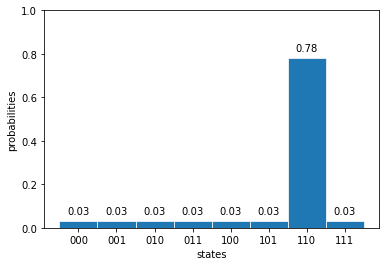

In [29]:
c = Circuit(3) # Construct the circuit (2 qubits)

for i in range(0,3):
    c.add(gates.H(i)) # Add some gates

# Rotation of the wanted state
oracle(0,1,2) 

difussion(0,1,2)

# Execute the circuit and obtain the final state
result = c() # c.execute(initial_state) also works
# Draw the circuit
print(c.draw())

x = ['000','001','010','011','100','101','110','111']
y = result.state(numpy=True)

prob = [x**2 for x in y] # elevating coeficients 

fig, ax = plt.subplots()

ax.bar(x, prob, width=1, edgecolor="white", linewidth=0.7)
ax.set(ylim=(0, 1), xlabel = 'states', ylabel = 'probabilities')

i=0 #writes the probability of each state 
for el in prob:
    ax.text(i-0.3,el+0.03, str(round(el.real, 2)), fontsize=10)
    i=i+1

plt.show()

### GROVER'S ALGORITHM 2 ITERATION

q0: ─H─H─X─H─H─X─H─X─H─X─H─H─X─H─H─X─H─X─H─X─H─
q1: ─H───o─H─X─────o─X─H─────o─H─X─────o─X─H───
q2: ─H─X─o─X─H─X───o─X─H─X───o─X─H─X───o─X─H───


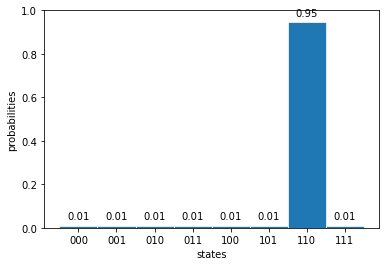

In [6]:
c = Circuit(3) # Construct the circuit (2 qubits)

for i in range(0,3):
    c.add(gates.H(i)) # Add some gates

# Rotation of the wanted state
oracle(0,1,2) 

difussion(0,1,2)

oracle(0,1,2) 

difussion(0,1,2)

# Execute the circuit and obtain the final state
result = c() # c.execute(initial_state) also works
# Draw the circuit
print(c.draw())

x = ['000','001','010','011','100','101','110','111']
y = result.state(numpy=True)

prob = [x**2 for x in y] # elevating coeficients

fig, ax = plt.subplots()

ax.bar(x, prob, width=1, edgecolor="white", linewidth=0.7)
ax.set(ylim=(0, 1), xlabel = 'states', ylabel = 'probabilities')

i=0 #writes the probability of each state 
for el in prob:
    ax.text(i-0.3,el+0.03, str(round(el.real, 2)), fontsize=10)
    i=i+1

plt.show()